# ML for US Energy comparison - Linear Regression

In [1]:
# import dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn

In [2]:
# read the data
df = pd.read_csv("db/us_comparison.csv", index_col=0)
df

,Year,Prod Data,Cons Data,Status
0,1960,2928205.0,45033606.0,0
1,1961,2952227.0,45684153.0,0
2,1962,3117444.0,47773067.0,0
3,1963,3096431.0,49605630.0,0
4,1964,3225249.0,51766732.0,0
5,1965,3395816.0,53965864.0,0
6,1966,3432463.0,56960904.0,0
7,1967,3690213.0,58916870.0,0
8,1968,3772655.0,62401694.0,0
9,1969,4094893.0,65578920.0,0


In [3]:
# add comparison column to the df
df["Comparison"] = df["Prod Data"] - df["Cons Data"]
df

,Year,Prod Data,Cons Data,Status,Comparison
0,1960,2928205.0,45033606.0,0,-42105401.0
1,1961,2952227.0,45684153.0,0,-42731926.0
2,1962,3117444.0,47773067.0,0,-44655623.0
3,1963,3096431.0,49605630.0,0,-46509199.0
4,1964,3225249.0,51766732.0,0,-48541483.0
5,1965,3395816.0,53965864.0,0,-50570048.0
6,1966,3432463.0,56960904.0,0,-53528441.0
7,1967,3690213.0,58916870.0,0,-55226657.0
8,1968,3772655.0,62401694.0,0,-58629039.0
9,1969,4094893.0,65578920.0,0,-61484027.0


In [14]:
X = df["Year"].values.reshape(-1,1)
y = df["Comparison"].values.reshape(-1,1)
# print the first 5 year values
print(X[:5])

[[1960]
 [1961]
 [1962]
 [1963]
 [1964]]


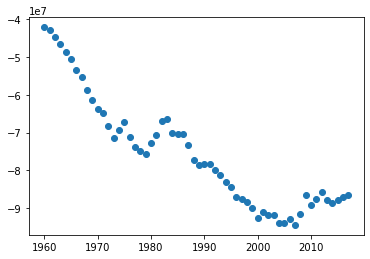

In [15]:
plt.scatter(X,y)

In [16]:
# split the data to train data and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [17]:
# Create a LinearRegression model and fit it to the scaled training data

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
# calculate the scores

training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.8337392535893539
Testing Score: 0.8184146169979463


In [19]:
# Use our model to make predictions
from sklearn.metrics import mean_squared_error, r2_score


predicted = model.predict(X_test)


In [20]:
# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")


Mean Squared Error (MSE): 42792650886698.54
R-squared (R2 ): 0.8184146169979463


In [21]:
predictions = model.predict(X_test[:5])

In [22]:
print(f"Predicted classes: {predictions}")

Predicted classes: [[-89239534.4276588 ]
 [-55345607.07198095]
 [-79660815.82714128]
 [-87765885.41219449]
 [-82608113.85806966]]


In [23]:
n = model.predict([[2050]])
n

array([[-1.20186164e+08]])